# Maple et al., 2025 Figure 2B and calculating *FLC* mRNA decay rates from smFISH data

## Import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc 
import seaborn as sns
from matplotlib.ticker import MultipleLocator
import statsmodels.api as sm
import statsmodels.formula.api as smf

rc('font',**{'family':'sans-serif','sans-serif':['Arial']})

## Import data (counts per unit area per cell) from Excel file

In [ ]:
file_path = 'FLC_mRNA_ActD_Decay_Exp2_Dataset.xlsx'
df = pd.read_excel(file_path, sheet_name='Final Summary', engine='openpyxl')

# Extract the first 5 columns to make the NV data table
NV_df = df.iloc[:, 0:5]

# Extract the last 5 columns to make the W2 data table
W2_df = df.iloc[:, 5:]


## Make the plot

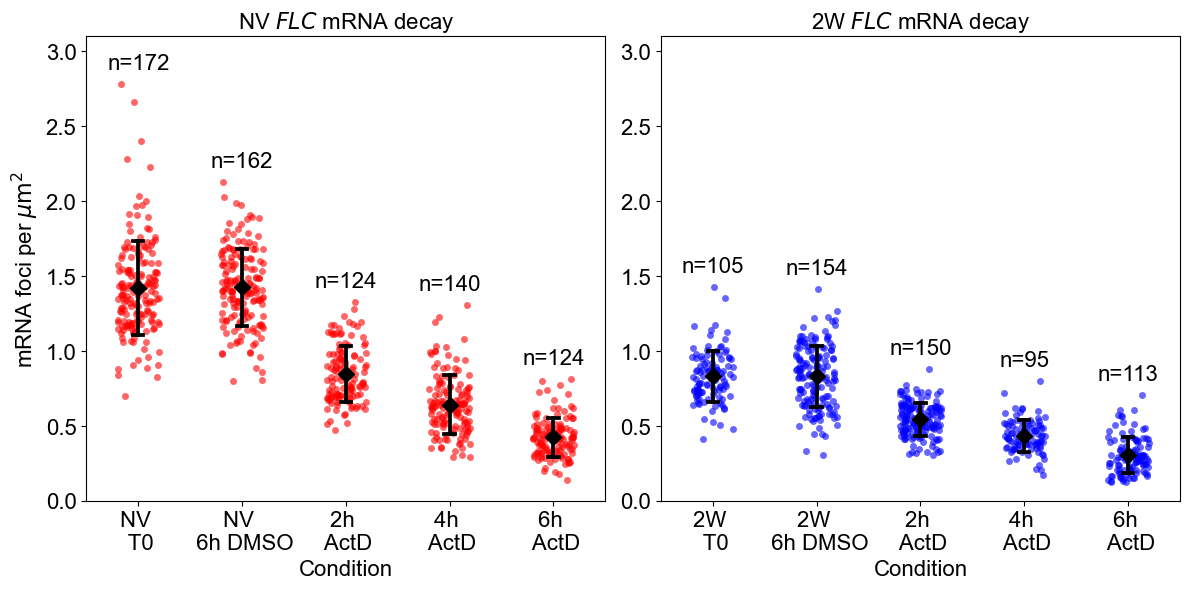

In [3]:
# Plot the data
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.stripplot(data=NV_df, color='red', jitter=0.2, size=5, alpha=0.6, zorder=1)  # Lower zorder
sns.pointplot(data=NV_df, color='black', errorbar='sd', capsize=0.1, markers='D', linestyle='none', zorder=2)  # Higher zorder
# Add annotations for the number of data points
for i, col in enumerate(NV_df.columns):
    count = NV_df[col].dropna().shape[0]  # Count non-NaN values
    plt.text(i, NV_df[col].max() + 0.1, f'n={count}', ha='center', fontsize=16, color='black')
#Set xtick labels
plt.xticks([0, 1, 2, 3, 4], ['NV \n T0', 'NV \n 6h DMSO',  '2h \n ActD', '4h \n ActD', '6h \n ActD'])
plt.ylabel(r'mRNA foci per $\mu \mathrm{m}^2$', fontsize=16)
plt.xlabel('Condition', fontsize=16)
plt.title(r'NV $\mathit{FLC}$ mRNA decay', fontsize=16)
#Set y-axis limits
plt.ylim(0, 3.1)
#Set xtick label size
plt.xticks(fontsize=16)
#Set ytick label size
plt.yticks(fontsize=16)
#Set yticks
# plt.yticks(np.arange(0, 1.6, 0.5))

plt.subplot(1, 2, 2)
sns.stripplot(data=W2_df, color='blue', jitter=0.2, size=5, alpha=0.6, zorder=1)  # Lower zorder
sns.pointplot(data=W2_df, color='black', errorbar='sd', capsize=0.1, markers='D', linestyle='none', zorder=2)  # Higher zorder
# Add annotations for the number of data points
for i, col in enumerate(W2_df.columns):
    count = W2_df[col].dropna().shape[0]  # Count non-NaN values
    plt.text(i, W2_df[col].max() + 0.1, f'n={count}', ha='center', fontsize=16, color='black')
#Set xtick labels
plt.xticks([0, 1, 2, 3, 4], ['2W \n T0', '2W \n 6h DMSO', '2h \n ActD', '4h \n ActD', '6h \n ActD'])
# plt.ylabel(r'mRNA foci per $\mu \mathrm{m}^2$', fontsize=16)
plt.xlabel('Condition', fontsize=16)
plt.title(r'2W $\mathit{FLC}$ mRNA decay', fontsize=16)
#Set xtick label size
plt.xticks(fontsize=16)
#Set ytick label size
plt.yticks(fontsize=16)
#Set yticks
# plt.yticks(np.arange(0, 1.6, 0.5))
plt.tight_layout()

#Set y-axis limits
plt.ylim(0, 3.1) # Set the y-axis limits to be the same for both plots

plt.savefig('FLC_smFISH_decayplot_combined_v2.pdf')

plt.show()



## Fit exponential decay models to the NV data and 2W data separately and perform statistical test (ANCOVA) to compare decay rates at NV and 2W

Exponential decay fit results for NV:
Decay constant (k): 0.1792 ± 0.0090
Half-life: 3.8687 ± 0.1952
Intercept: 0.1884 ± 0.0389
Exponential decay fit results for W2:
Decay constant (k): 0.1589 ± 0.0092
Half-life: 4.3622 ± 0.2516
Intercept: -0.2953 ± 0.0381


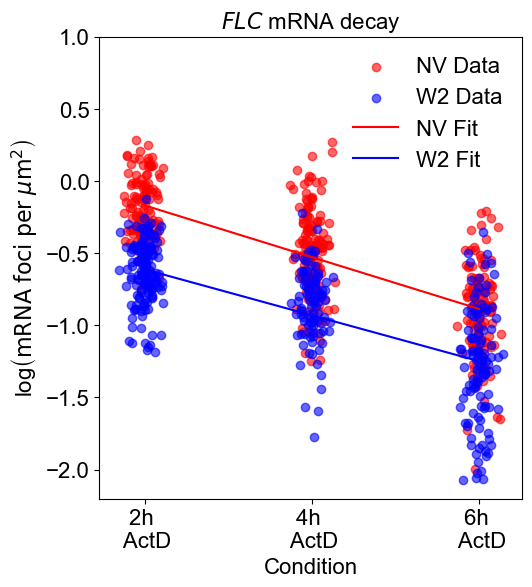

                 Results: Ordinary least squares
Model:              OLS              Adj. R-squared:     0.571    
Dependent Variable: log_data         AIC:                272.7819 
Date:               2025-05-20 15:08 BIC:                291.2408 
No. Observations:   746              Log-Likelihood:     -132.39  
Df Model:           3                F-statistic:        331.5    
Df Residuals:       742              Prob (F-statistic): 1.69e-136
R-squared:          0.573            Scale:              0.083947 
------------------------------------------------------------------
                   Coef.  Std.Err.    t     P>|t|   [0.025  0.975]
------------------------------------------------------------------
Intercept          0.1884   0.0396   4.7539 0.0000  0.1106  0.2662
group[T.W2]       -0.4837   0.0545  -8.8750 0.0000 -0.5907 -0.3767
time              -0.1792   0.0092 -19.4765 0.0000 -0.1972 -0.1611
time:group[T.W2]   0.0203   0.0129   1.5750 0.1157 -0.0050  0.0455
-------------

In [7]:
# Fit an exponential decay model to the NV data
# Extract the non-NaN values for the 2h time point into an array
NV_2h = NV_df.iloc[:, 2].dropna().values
# Extract the non-NaN values for the 4h time point into an array
NV_4h = NV_df.iloc[:, 3].dropna().values
# Extract the non-NaN values for the 6h time point into an array
NV_6h = NV_df.iloc[:, 4].dropna().values
# Combine the arrays into a single vertical array
NV_data = np.concatenate((NV_2h, NV_4h, NV_6h))
# Create an array of time points corresponding to the data
time_points = np.concatenate((np.full(NV_2h.shape, 2), np.full(NV_4h.shape, 4), np.full(NV_6h.shape, 6)))
ones_array = np.ones(NV_data.shape)
# Make a linear fit to the log of the data
log_data = np.log(NV_data)
X = np.column_stack((ones_array,time_points))
NV_x = time_points
NV_y = log_data
# Create an array with the label 'NV' repeated for the length of the data
NV_group = np.full(NV_data.shape, 'NV')
# Combine the data into a DataFrame
NV_df_combined = pd.DataFrame({'time': NV_x, 'log_data': NV_y, 'group': NV_group})

# Perform the linear regression
from numpy.linalg import lstsq, inv

# Fit the data
A, residuals, rank, s = lstsq(X, log_data, rcond=None)

# Extract the slope and intercept
slope = A[1]
intercept = A[0]

# Calculate the decay constant and half-life
decay_constant = -slope
half_life = np.log(2) / decay_constant

# Estimate the covariance matrix
# Covariance matrix = (X^T * X)^(-1) * residual_variance
residual_variance = np.sum((log_data - (X @ A))**2) / (len(log_data) - len(A))  # Variance of residuals
cov_matrix = inv(X.T @ X) * residual_variance

# Standard errors of the parameters
slope_error = np.sqrt(cov_matrix[1, 1])
intercept_error = np.sqrt(cov_matrix[0, 0])
half_life_error = np.log(2) / (decay_constant**2) * slope_error

NV_intercept = intercept
NV_slope = slope

# Print the results with error bars
print("Exponential decay fit results for NV:")
print(f"Decay constant (k): {decay_constant:.4f} ± {slope_error:.4f}")
print(f"Half-life: {half_life:.4f} ± {half_life_error:.4f}")
print(f"Intercept: {intercept:.4f} ± {intercept_error:.4f}")


# Fit an exponential decay model to the W2 data
# Extract the non-NaN values for the 2h time point into an array
W2_2h = W2_df.iloc[:, 2].dropna().values
# Extract the non-NaN values for the 4h time point into an array
W2_4h = W2_df.iloc[:, 3].dropna().values
# Extract the non-NaN values for the 6h time point into an array
W2_6h = W2_df.iloc[:, 4].dropna().values
# Combine the arrays into a single vertical array
W2_data = np.concatenate((W2_2h, W2_4h, W2_6h))
# Create an array of time points corresponding to the data
time_points = np.concatenate((np.full(W2_2h.shape, 2), np.full(W2_4h.shape, 4), np.full(W2_6h.shape, 6)))
ones_array = np.ones(W2_data.shape)
# Make a linear fit to the log of the data
log_data = np.log(W2_data)
X = np.column_stack((ones_array,time_points))
W2_x = time_points
W2_y = log_data
# Create an array with the label 'W2' repeated for the length of the data
W2_group = np.full(W2_data.shape, 'W2')
# Combine the data into a DataFrame
W2_df_combined = pd.DataFrame({'time': W2_x, 'log_data': W2_y, 'group': W2_group})
# Perform the linear regression
from numpy.linalg import lstsq, inv
# Fit the data
A, residuals, rank, s = lstsq(X, log_data, rcond=None)
# Extract the slope and intercept
slope = A[1]
intercept = A[0]
# Calculate the decay constant and half-life
decay_constant = -slope
half_life = np.log(2) / decay_constant
# Estimate the covariance matrix
# Covariance matrix = (X^T * X)^(-1) * residual_variance
residual_variance = np.sum((log_data - (X @ A))**2) / (len(log_data) - len(A))  # Variance of residuals
cov_matrix = inv(X.T @ X) * residual_variance
# Standard errors of the parameters
slope_error = np.sqrt(cov_matrix[1, 1])
intercept_error = np.sqrt(cov_matrix[0, 0])
half_life_error = np.log(2) / (decay_constant**2) * slope_error
# Print the results with error bars
print("Exponential decay fit results for W2:")
print(f"Decay constant (k): {decay_constant:.4f} ± {slope_error:.4f}")
print(f"Half-life: {half_life:.4f} ± {half_life_error:.4f}")
print(f"Intercept: {intercept:.4f} ± {intercept_error:.4f}")

W2_intercept = intercept
W2_slope = slope

# Add jitter to NV_x and W2_x
jitter_strength = 0.1  # Adjust this value to control the amount of jitter
NV_x_jittered = NV_x + np.random.normal(0, jitter_strength, size=NV_x.shape)
W2_x_jittered = W2_x + np.random.normal(0, jitter_strength, size=W2_x.shape)

# Plot the fitted exponential decay curves for NV and W2 in the same plot
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.scatter(NV_x_jittered, NV_y, color='red', label='NV Data', alpha=0.6)
plt.scatter(W2_x_jittered, W2_y, color='blue', label='W2 Data', alpha=0.6)
plt.plot(NV_x, NV_intercept + NV_slope * NV_x, color='red', label='NV Fit')
plt.plot(W2_x, W2_intercept + W2_slope * W2_x, color='blue', label='W2 Fit')
# Set y-axis limits
plt.ylim(-2.2, 1)
# Add legend without a box
plt.legend(loc='upper right', fontsize=16, frameon=False)

#Set xtick labels
plt.xticks([2, 4, 6], ['2h \n ActD', '4h \n ActD', '6h \n ActD'], fontsize=16)
plt.ylabel(r'log$ \left( \mathrm{mRNA \;foci \;per} \; \mu \mathrm{m}^2 \right)$', fontsize=16)
plt.xlabel('Condition', fontsize=16)
plt.title(r'$\mathit{FLC}$ mRNA decay', fontsize=16)
#Set y-axis tick label size
plt.yticks(fontsize=16)
# Save the plot
plt.savefig('FLC_smFISH_decayplot_combined_v2_fit.pdf',bbox_inches='tight')
plt.show()




# Statistical comparison of NV and 2W fits
# Combine the two DataFrames
combined_df = pd.concat([NV_df_combined, W2_df_combined], ignore_index=True)
# Fit a linear model with interaction term
model = smf.ols('log_data ~ time * group', data=combined_df).fit()

# Print the summary of the model with more decimal places
print(model.summary2(float_format="%.5f"))
# Print the model summary to a text file
with open('FLC_smFISH_decay_model_summary.txt', 'w') as f:
    f.write(model.summary().as_text())



## Compare NV to 2WT0

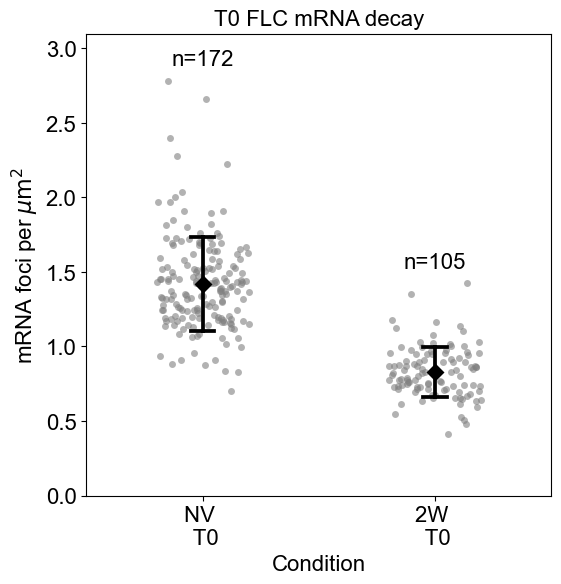

In [8]:
# Extract the first T0 columns to make the T0 data table
T0_df = df.iloc[:, [0,5]]
# Plot the T0 data
plt.figure(figsize=(6, 6))
sns.stripplot(data=T0_df, color='gray', jitter=0.2, size=5, alpha=0.6,zorder=1)  # Lower zorde
sns.pointplot(data=T0_df, color='black', errorbar='sd', capsize=0.1, markers='D',linestyle='none', zorder=2)  # Higher zorder
# Add annotations for the number of data points
for i, col in enumerate(T0_df.columns):
    count = T0_df[col].dropna().shape[0]  # Count non-NaN values
    plt.text(i, T0_df[col].max() + 0.1, f'n={count}', ha='center', fontsize=16, color='black')
#Set xtick labels
plt.xticks([0, 1], ['NV \n T0', '2W \n T0'])
plt.ylabel(r'mRNA foci per $\mu \mathrm{m}^2$', fontsize=16)
plt.xlabel('Condition', fontsize=16)
plt.title('T0 FLC mRNA decay', fontsize=16)
#Set xtick label size
plt.xticks(fontsize=16)
#Set ytick label size
plt.yticks(fontsize=16)
plt.ylim(0, 3.1)

# Save figure
plt.savefig('FLC_smFISH_T0_plot_v2.pdf',bbox_inches='tight')
plt.show()
